- Loay Hassan Ali 41910176
- Kareem Mohamed Fouad 41910329

# Importing important libraries

In [106]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

# Reading dataset and understanding features

In [107]:
dataset = pd.read_csv('census.csv')
dataset.info()
print("Data shape= ", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Data shape=  (48842, 15)


In [108]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [109]:
dataset.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [110]:
print(dataset.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [111]:
# Handling Categorical data values
list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i in list:
    print(i,"values: ",dataset[i].unique())
    print(i,"Category number= ", dataset[i].unique().size ,"\n")

workclass values:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
workclass Category number=  9 

education values:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
education Category number=  16 

marital-status values:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
marital-status Category number=  7 

occupation values:  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
occupation Category number=  15 

relationship values:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
relationship Category number=  6 

ra

In [112]:
# Digitizing the income column 
dataset['income']=dataset['income'].map({'<=50K':0, '>50K':1}) #less than 50k is 0 more than 50k is 1

# Data Visualization

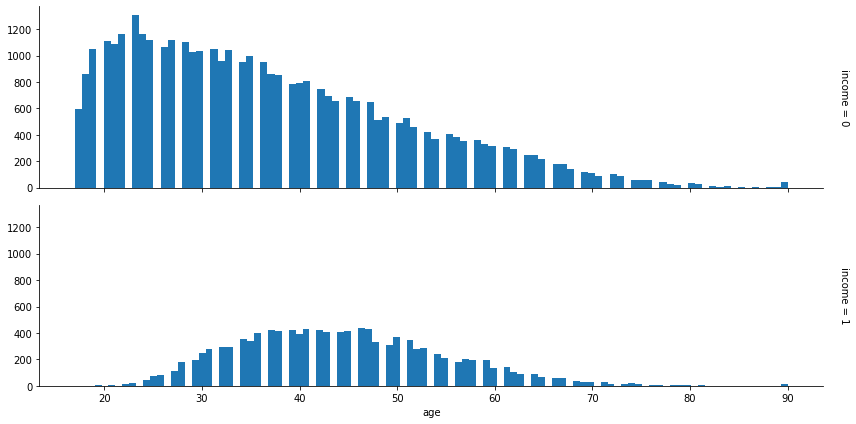

In [113]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'age',bins=100)
plt.show()

It appears that income above 50k have *normal distribution*,
In the other hand low ages shows higher results for income not above 50k

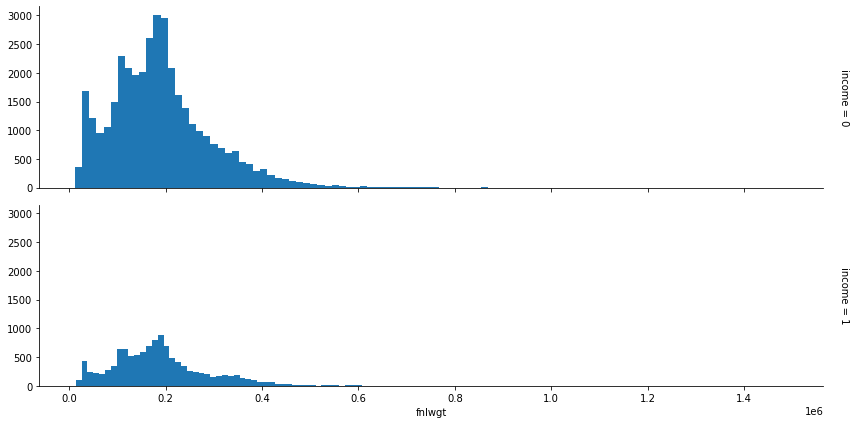

In [114]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'fnlwgt',bins=100)
plt.show()

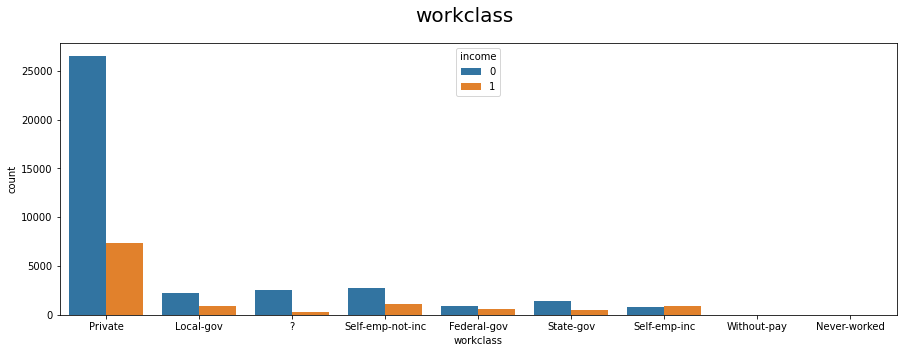

In [115]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='workclass', hue='income', data = dataset)

plt.suptitle('workclass',fontsize=20)
plt.show()

Private contains most of the records we can cut the categories to private and other, also remove '?' 

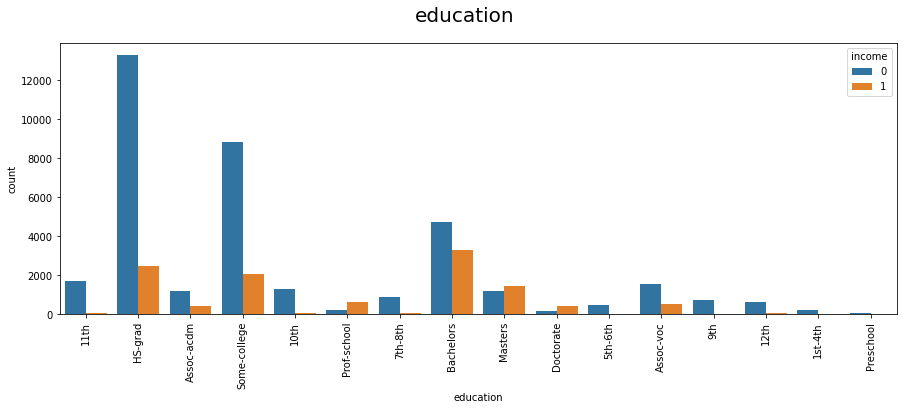

In [116]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='education', hue='income', data = dataset)
plt.xticks(rotation=90)
plt.suptitle('education',fontsize=20)
plt.show()

Cutting categories here aswell. Grouping categories with similar levels of education together.
- Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad as 'hs-or-under'
- Prof-school , Assoc-acdm , Assoc-voc , Some-college as 'acdm-edu'
- Bachelors , Masters , Doctorate as 'acdmgrad-or-above'

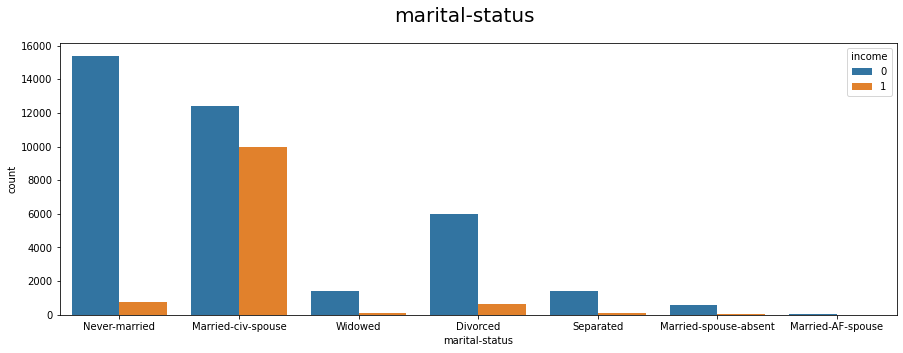

In [117]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='marital-status', hue='income', data = dataset)
plt.suptitle('marital-status',fontsize=20)
plt.show()

- Grouping Divorced and Separated into 'divorced'. 
- Grouping Married-civ-spouse and Married-AF-spouse into 'couple'. 
- Finally grouping Widowed and Married-spouse-absent into 'spouse-missing'.

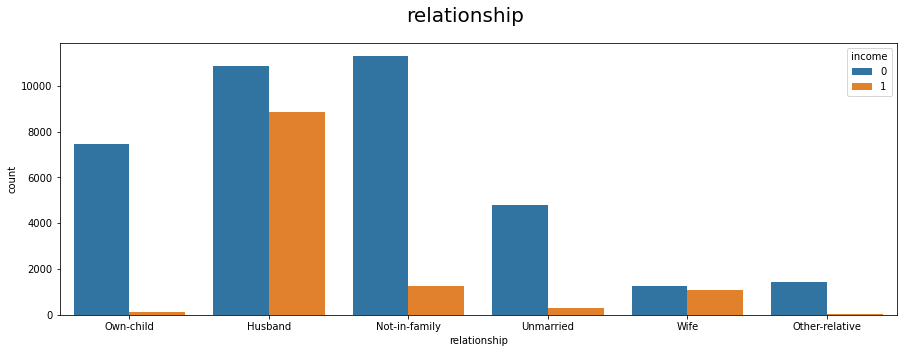

In [118]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='relationship', hue='income', data = dataset)
plt.suptitle('relationship',fontsize=20)
plt.show()

`Unclear`

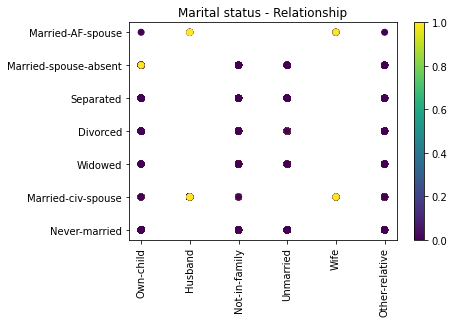

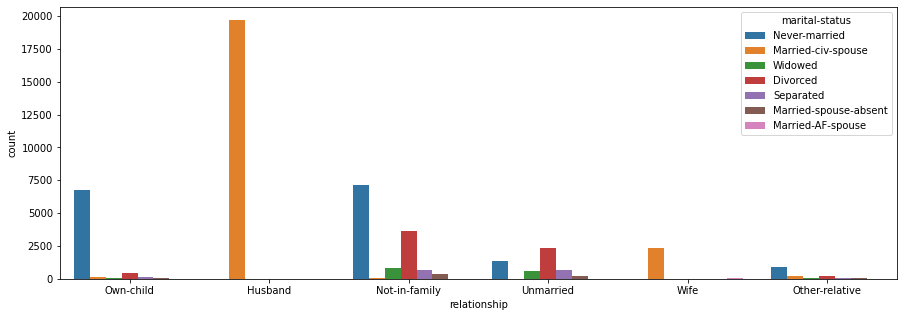

In [119]:
plt.scatter(dataset['relationship'], dataset['marital-status'], c=dataset['income']) 
plt.title("Marital status - Relationship")
plt.xticks(rotation = 90)
plt.colorbar()
plt.show()

f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=dataset,x='relationship',hue='marital-status')
plt.show()

This show that the columns relationship and marital-status are represents the same information, thus neglecting relationship column.

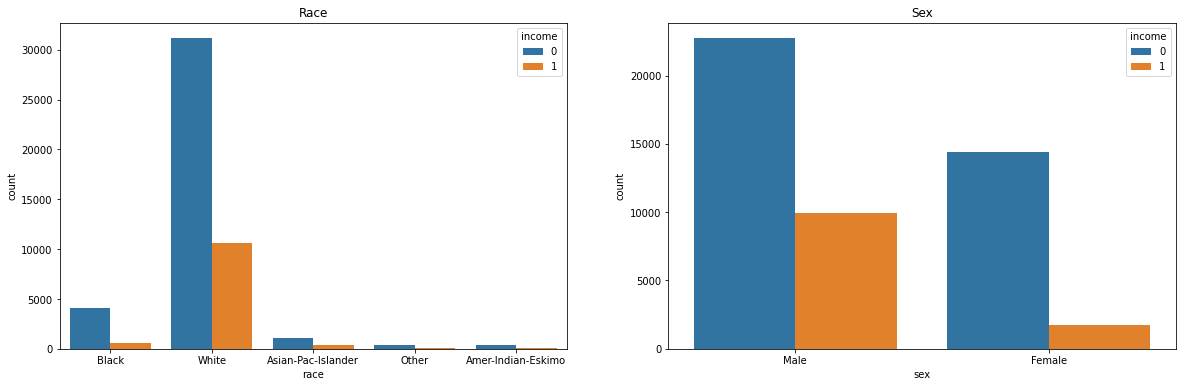

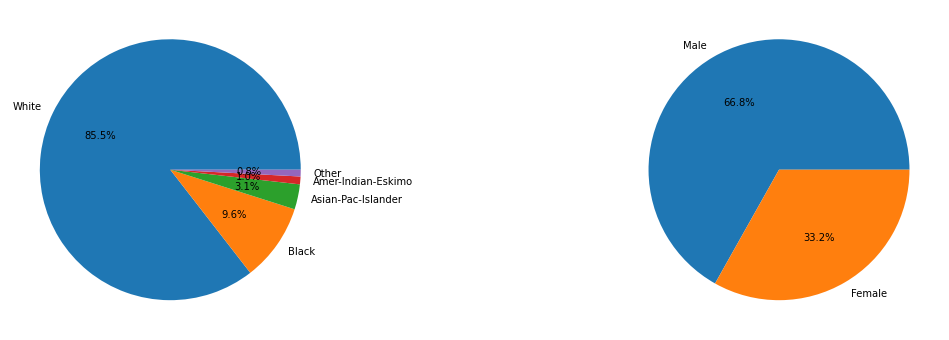

In [120]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='race', hue='income', data = dataset)
plt.title("Race")

fig.add_subplot(1,2,2)
sns.countplot(x='sex', hue='income', data = dataset)
plt.title("Sex")

fig1 = plt.figure(figsize=(20,6))
fig1.add_subplot(1,2,1)
plt.pie(dataset['race'].value_counts(),labels=dataset['race'].value_counts().index, autopct='%1.1f%%')
fig1.set_facecolor('white')
fig1.add_subplot(1,2,2)
plt.pie(dataset['sex'].value_counts(),labels=dataset['sex'].value_counts().index, autopct='%1.1f%%');

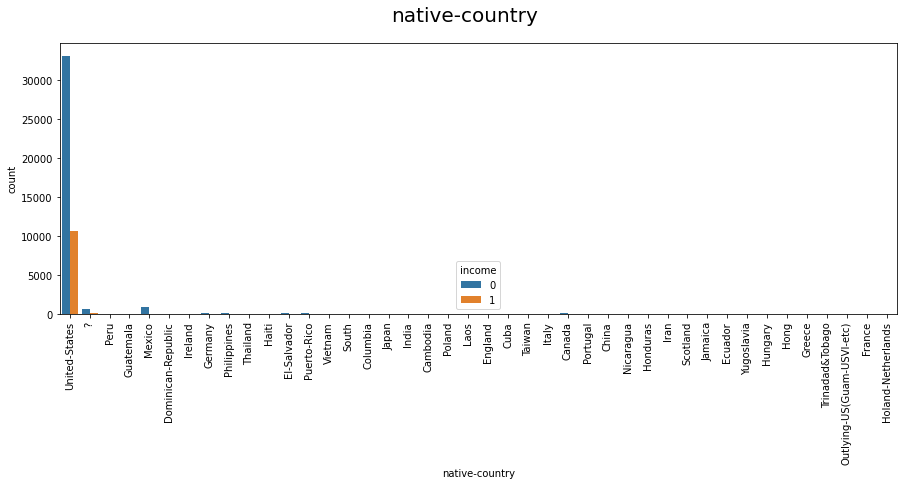

In [121]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='native-country', hue='income', data = dataset)
plt.suptitle('native-country',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

Category cutting on native-country and race

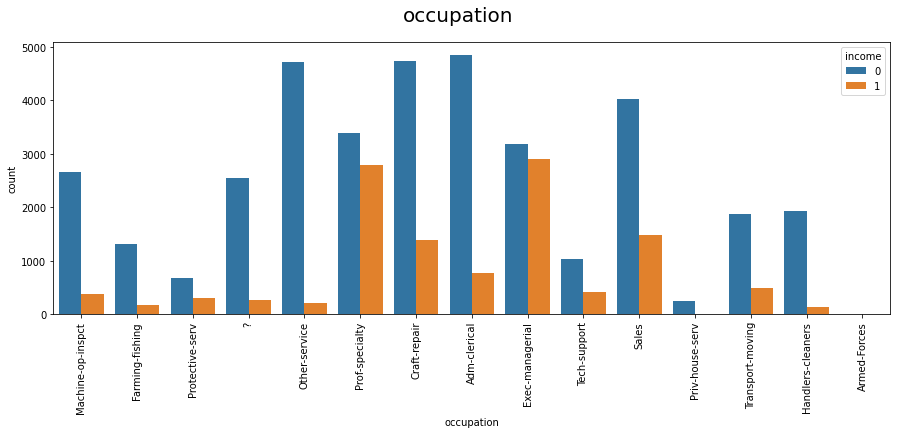

In [122]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='occupation', hue='income', data = dataset)
plt.suptitle('occupation',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

This column is fairly distributed but has a lot of categories

In [123]:
over_50k_count_by_occ=pd.DataFrame(dataset[dataset['income']==1]['occupation'].value_counts())
count_by_occ=pd.DataFrame(dataset['occupation'].value_counts())
merged=pd.merge(over_50k_count_by_occ,count_by_occ,left_index=True,right_index=True)
merged.rename(columns={'occupation_x':'income_over_50K','occupation_y':'Total'}, inplace=True)
merged['percent_of_above_50K']=merged['income_over_50K']/(merged['Total'])
merged=merged.sort_values(by='percent_of_above_50K',axis=0,ascending=False)
merged

,income_over_50K,Total,percent_of_above_50K
Exec-managerial,2908,6086,0.477818
Prof-specialty,2784,6172,0.451069
Armed-Forces,5,15,0.333333
Protective-serv,308,983,0.313327
Tech-support,420,1446,0.290456
Sales,1475,5504,0.267987
Craft-repair,1383,6112,0.226276
Transport-moving,481,2355,0.204246
Adm-clerical,768,5611,0.136874
Machine-op-inspct,372,3022,0.123097


Category grouping by the percentage of above 50k income 
- Group 1 for 0.3 or more
- Group 2 for between 0.2 and 0.3
- Group 3 for less than 0.2

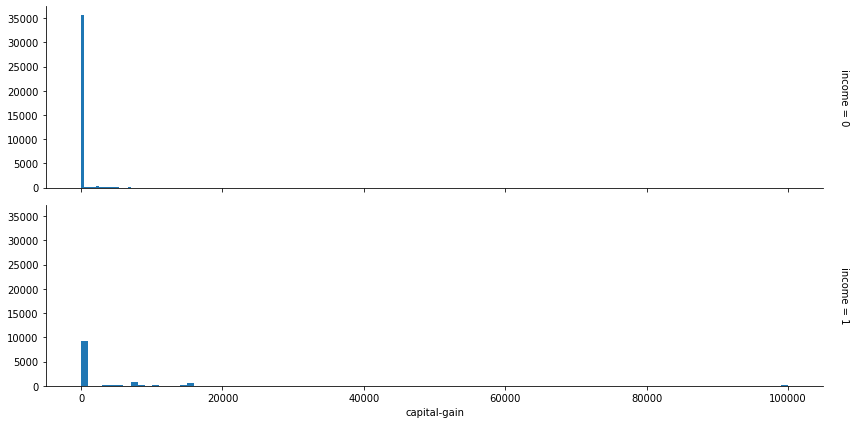

In [124]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'capital-gain',bins=100)
plt.show()

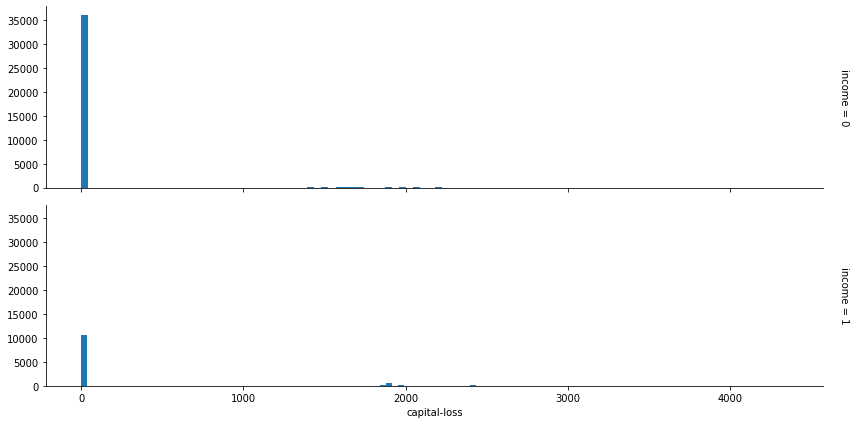

In [125]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'capital-loss',bins=100)
plt.show()

Not using that one

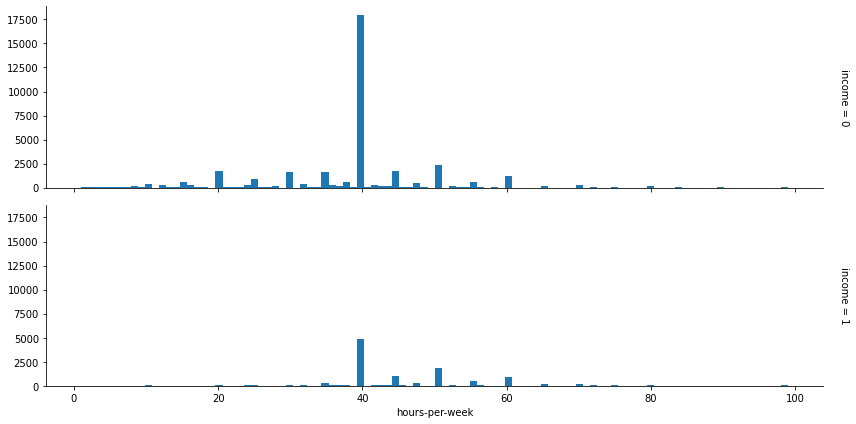

In [126]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'hours-per-week',bins=100)
plt.show()

# Preprocessing

In [127]:
# Replacing unique values (?) with null
dataset.replace("?", np.nan, inplace = True)
dataset.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [128]:
dataset = dataset.dropna()
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [130]:
dataset['workclass']=dataset['workclass'].map({'Private':1})
dataset['workclass'].fillna(0, inplace=True)

dataset['race']=dataset['race'].map({'White':1})
dataset['race'].fillna(0, inplace=True)

dataset['native-country']=dataset['native-country'].map({'United-States':1})
dataset['native-country'].fillna(0, inplace=True)

dataset.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'], 'hs-or-under', inplace=True)
dataset.replace(['Prof-school','Assoc-acdm','Assoc-voc','Some-college'], 'acdm-edu', inplace=True)
dataset.replace(['Bachelors','Masters','Doctorate'], 'acdmgrad-or-above', inplace=True)

dataset['occupation'] = dataset['occupation'].map({
    'Exec-managerial':'level_3',
    'Prof-specialty':'level_3',
    'Armed-Forces':'level_3',
    'Protective-serv':'level_3',
    'Tech-support':'level_2',
    'Sales':'level_2',
    'Craft-repair':'level_2',
    'Transport-moving':'level_2',
    'Adm-clerical':'level_1',
    'Machine-op-inspct':'level_1',
    'Farming-fishing':'level_1',
    'Handlers-cleaners':'level_1',
    'Other-service':'level_1',
    'Priv-house-serv':'level_1'})

dataset.replace('Never-married', 0, inplace=True)
dataset.replace(['Divorced','Separated'], 1, inplace=True)
dataset.replace(['Married-civ-spouse','Married-AF-spouse'], 2, inplace=True)
dataset.replace(['Married-spouse-absent','Widowed'], 3, inplace=True)


<ipython-input-130-fa425527dd16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['workclass']=dataset['workclass'].map({'Private':1})
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-130-fa425527dd16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [131]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1.0,226802,hs-or-under,7,0,level_1,Own-child,0.0,Male,0,0,40,1.0,0
1,38,1.0,89814,hs-or-under,9,2,level_1,Husband,1.0,Male,0,0,50,1.0,0
2,28,0.0,336951,acdm-edu,12,2,level_3,Husband,1.0,Male,0,0,40,1.0,1
3,44,1.0,160323,acdm-edu,10,2,level_1,Husband,0.0,Male,7688,0,40,1.0,1
5,34,1.0,198693,hs-or-under,6,0,level_1,Not-in-family,1.0,Male,0,0,30,1.0,0


In [132]:
# Digitizing string features using label encoder
le=LabelEncoder()

dataset["sex"]=le.fit_transform(dataset["sex"])
dataset["education"]=le.fit_transform(dataset["education"])
dataset["occupation"]=le.fit_transform(dataset["occupation"])

<ipython-input-132-9e27f7d1374e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sex"]=le.fit_transform(dataset["sex"])
<ipython-input-132-9e27f7d1374e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["education"]=le.fit_transform(dataset["education"])
<ipython-input-132-9e27f7d1374e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  float64
 2   fnlwgt          45222 non-null  int64  
 3   education       45222 non-null  int64  
 4   education-num   45222 non-null  int64  
 5   marital-status  45222 non-null  int64  
 6   occupation      45222 non-null  int64  
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  float64
 9   sex             45222 non-null  int64  
 10  capital-gain    45222 non-null  int64  
 11  capital-loss    45222 non-null  int64  
 12  hours-per-week  45222 non-null  int64  
 13  native-country  45222 non-null  float64
 14  income          45222 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 5.5+ MB


In [134]:
post_dataset = dataset.drop(['relationship'], axis=1)
x = post_dataset.drop(columns=['income'], axis=1)
y = post_dataset['income']
print("Features: \n", x.head())
print("Labels: \n", y.head())

Features: 
    age  workclass  fnlwgt  education  education-num  marital-status  \
0   25        1.0  226802          2              7               0   
1   38        1.0   89814          2              9               2   
2   28        0.0  336951          0             12               2   
3   44        1.0  160323          0             10               2   
5   34        1.0  198693          2              6               0   

   occupation  race  sex  capital-gain  capital-loss  hours-per-week  \
0           0   0.0    1             0             0              40   
1           0   1.0    1             0             0              50   
2           2   1.0    1             0             0              40   
3           0   0.0    1          7688             0              40   
5           0   1.0    1             0             0              30   

   native-country  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
5             1.0  
Labels: 

In [135]:
post_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  float64
 2   fnlwgt          45222 non-null  int64  
 3   education       45222 non-null  int64  
 4   education-num   45222 non-null  int64  
 5   marital-status  45222 non-null  int64  
 6   occupation      45222 non-null  int64  
 7   race            45222 non-null  float64
 8   sex             45222 non-null  int64  
 9   capital-gain    45222 non-null  int64  
 10  capital-loss    45222 non-null  int64  
 11  hours-per-week  45222 non-null  int64  
 12  native-country  45222 non-null  float64
 13  income          45222 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 5.2 MB


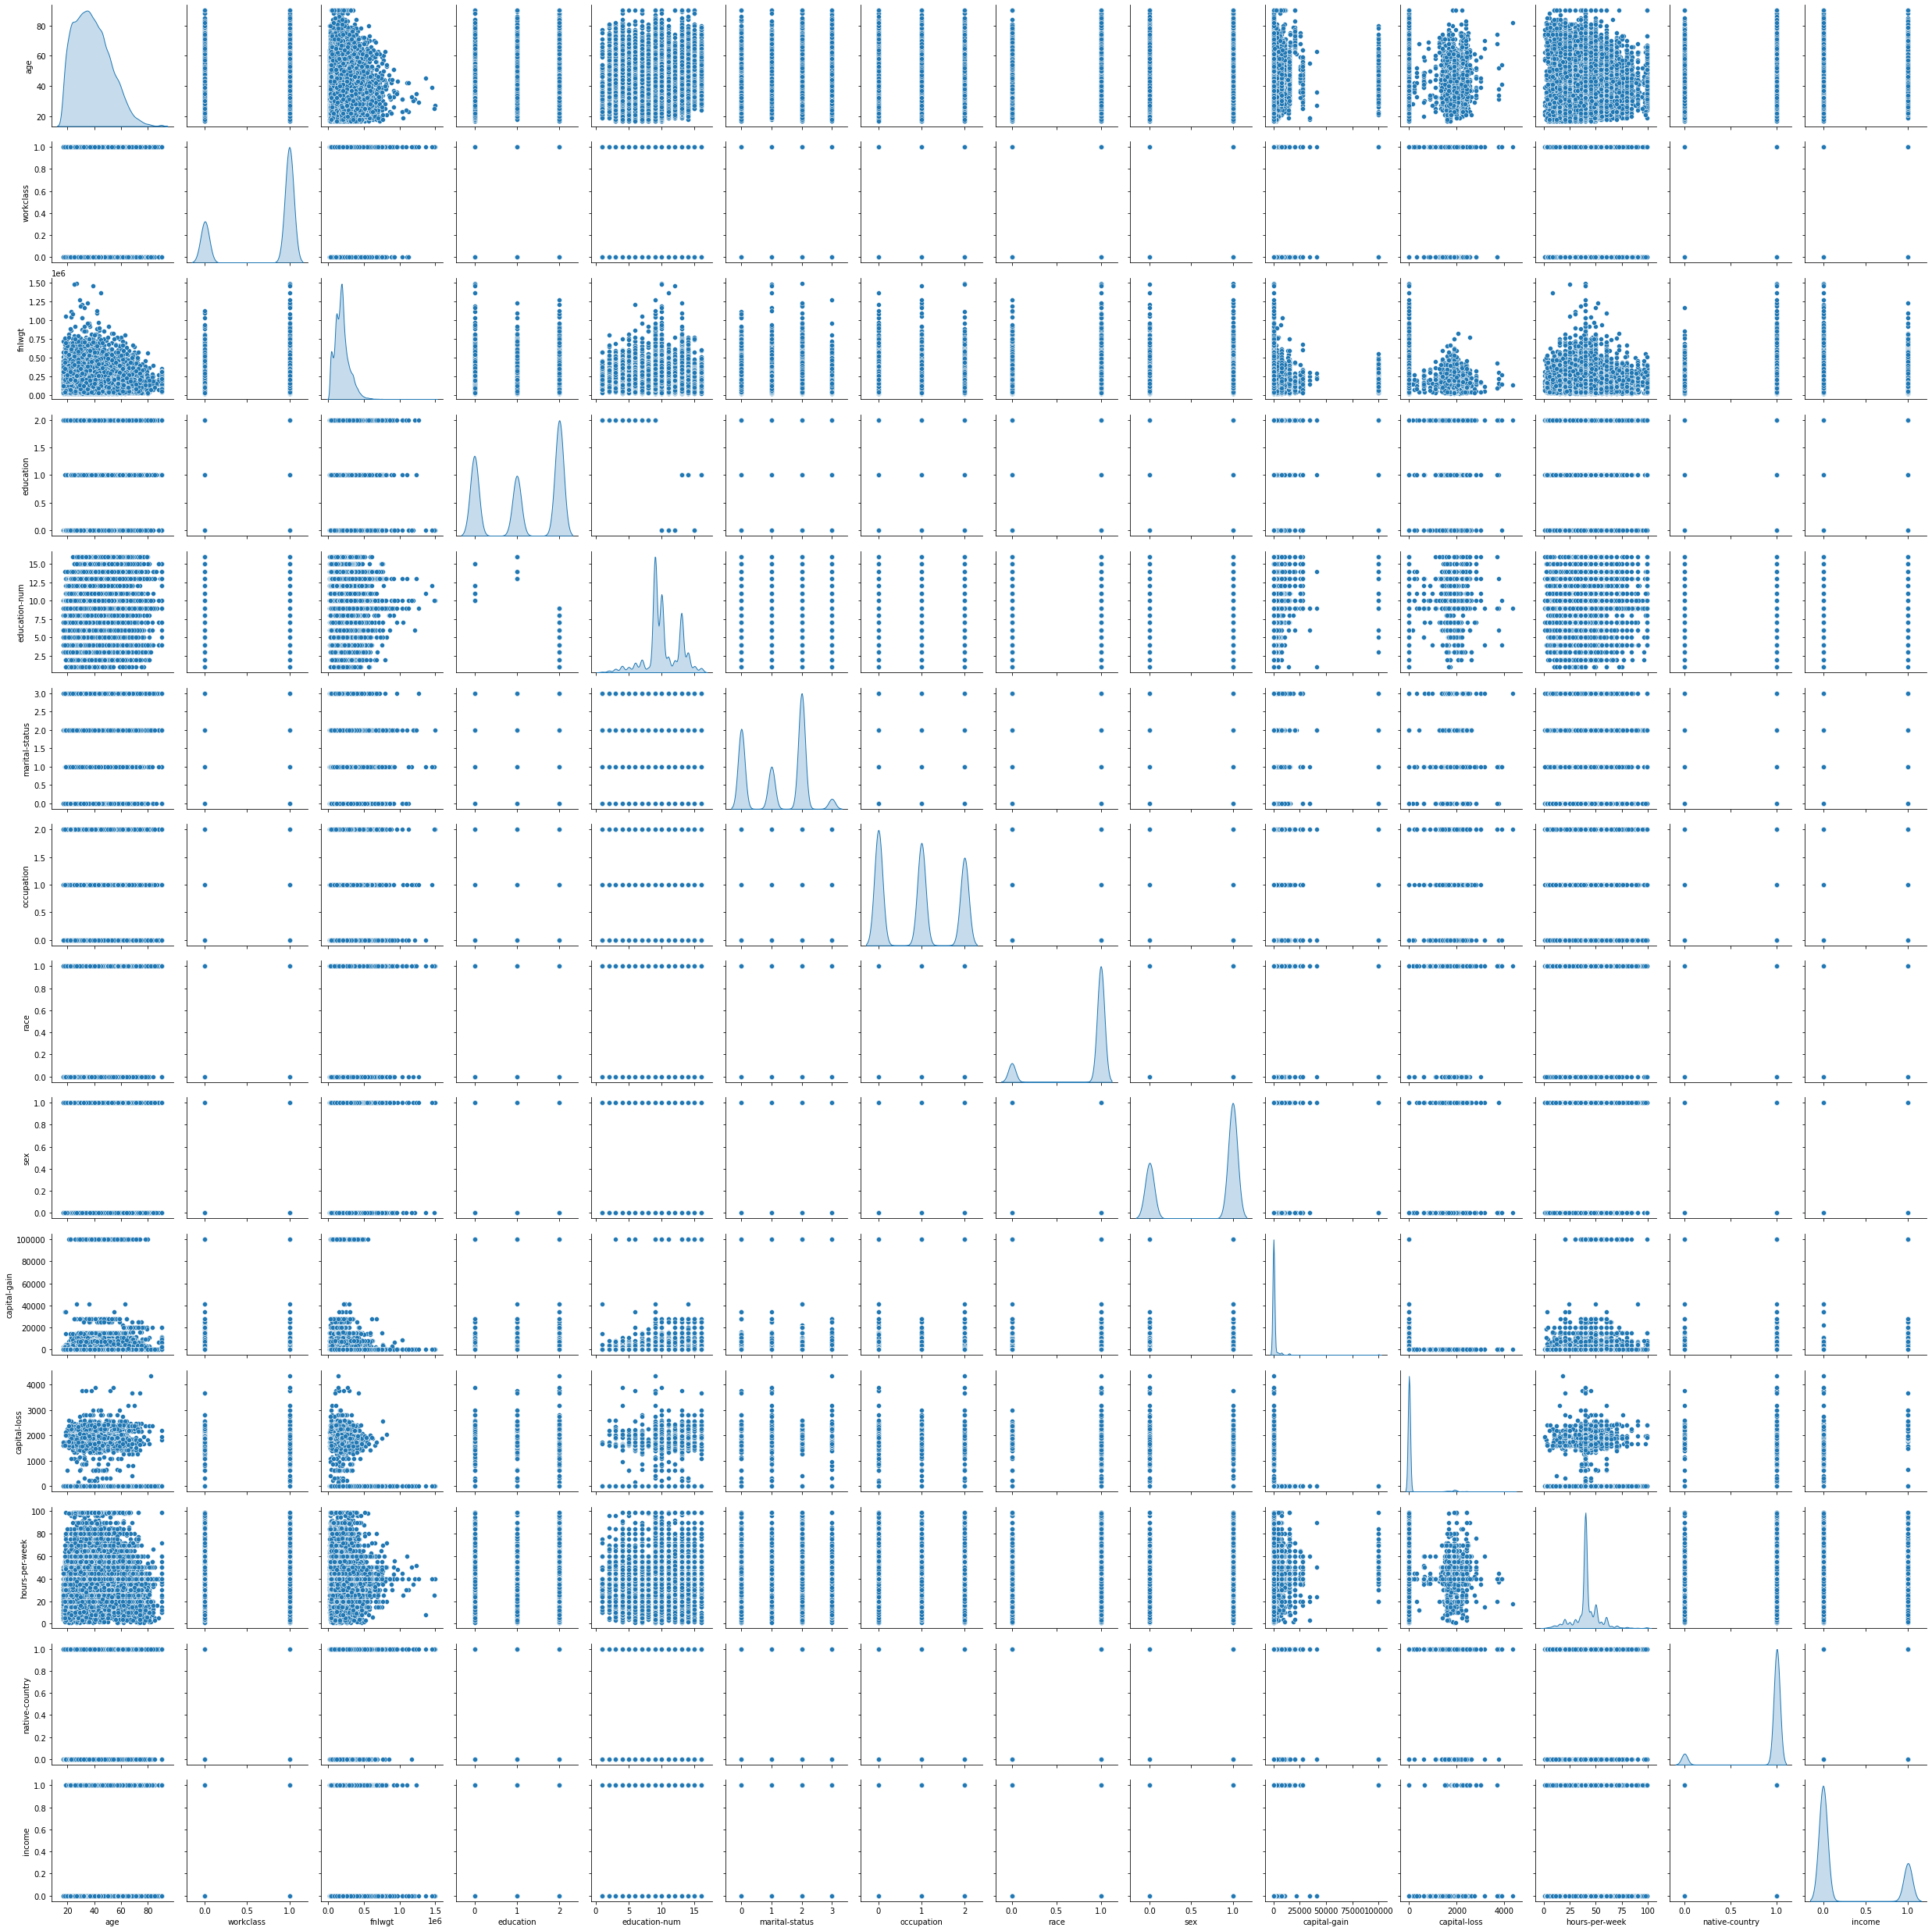

In [136]:
# Plotting Correlation between features
sns.pairplot(data = post_dataset, diag_kind='kde')
plt.show()

In [137]:
# Discretization
kbins = KBinsDiscretizer(n_bins=13, encode='ordinal', strategy='uniform')
post_dataset = kbins.fit_transform(post_dataset)

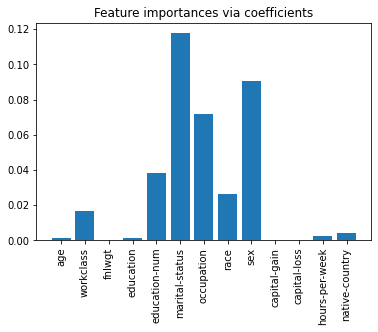

In [138]:
#Calculating feature importance
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(x.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

In [139]:
post_dataset = dataset.drop(['relationship'], axis=1)
x = post_dataset.drop(columns=['income', 'fnlwgt', 'capital-gain', 'capital-loss'], axis=1)
print("Features: \n", x.head())

Features: 
    age  workclass  education  education-num  marital-status  occupation  race  \
0   25        1.0          2              7               0           0   0.0   
1   38        1.0          2              9               2           0   1.0   
2   28        0.0          0             12               2           2   1.0   
3   44        1.0          0             10               2           0   0.0   
5   34        1.0          2              6               0           0   1.0   

   sex  hours-per-week  native-country  
0    1              40             1.0  
1    1              50             1.0  
2    1              40             1.0  
3    1              40             1.0  
5    1              30             1.0  


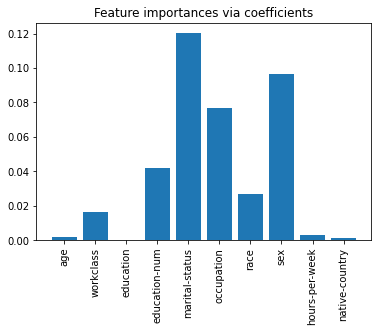

In [140]:
#Calculating feature importance
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(x.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

In [141]:
#Feature selection using sequential feature selection
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=5, direction="forward").fit(x, y)
print("Features selected by forward sequential selection: ", feature_names[sfs_forward.get_support()])

Features selected by forward sequential selection:  ['education-num' 'marital-status' 'occupation' 'sex' 'hours-per-week']


In [142]:
#Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# scaling
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)
# # convert back to dataframe
# x_train = pd.DataFrame(x_train, columns = x.columns.to_list())
# x_test = pd.DataFrame(x_test, columns = x.columns.to_list())

In [143]:
x_train.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
8605,29,0.0,1,13,0,1,1.0,1,40,1.0
28547,39,1.0,1,13,2,2,1.0,0,50,0.0
33927,41,1.0,1,13,2,2,1.0,0,15,0.0
14437,21,1.0,0,10,0,0,1.0,1,15,1.0
41839,58,1.0,2,9,2,1,1.0,1,50,1.0


Feature 0: 9364.936690497187
Feature 1: 141.18788214839807
Feature 2: 435.4690400747239
Feature 3: 2558.824792409533
Feature 4: 3460.781370705451
Feature 5: 2957.875600905024
Feature 6: 33.709552429403786
Feature 7: 557.0341927167514
Feature 8: 6731.227544251729
Feature 9: 4.467534616289688
Features selected by chi sqaure:  ['age' 'workclass' 'education' 'education-num' 'marital-status'
 'occupation' 'sex' 'hours-per-week']


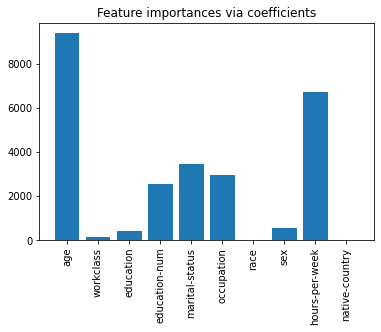

In [144]:
# Select 8 best features
selector = SelectKBest(score_func=chi2, k=8)

# Fit the selector to the training data
selector.fit(x_train, y_train)

# Get the selected features
selected_features = selector.transform(x_train)

# Print the scores of each feature
for i, score in enumerate(selector.scores_):
    print(f'Feature {i}: {score}')

print("Features selected by chi sqaure: ", selector.get_feature_names_out())
plt.bar(height=selector.scores_, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()


In [145]:
# Select the top 8 features from the test data
X_test_selected = selector.transform(x_test)
print(X_test_selected)

[[19.  0.  2. ...  0.  0. 40.]
 [45.  1.  2. ...  0.  1. 40.]
 [47.  1.  0. ...  1.  1. 40.]
 ...
 [37.  1.  2. ...  1.  1. 40.]
 [59.  0.  2. ...  2.  1. 60.]
 [26.  1.  2. ...  1.  1. 40.]]


# implementing RandomForest classifier 

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(min_samples_leaf=10, n_estimators=150, n_jobs=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

#Calculating the accuracy
print('Train Score: ', rf.score(x_train, y_train))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
# calculating the mean absolute error
MAE = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAE)
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSE)
# calculating the median absolute error
MdSE = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSE)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

Train Score:  0.8461729828343976
Accuracy Score:  0.8338308457711443
Mean Absolute Error Value is :  0.16616915422885573
Mean Squared Error Value is :  0.16616915422885573
Median Squared Error Value is :  0.0
Confusion matrix
 [[6329  513]
 [ 990 1213]]


# implementing GradientBoosting classifier

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, criterion='squared_error', min_samples_split=100, min_samples_leaf=1, max_depth=3, max_features='log2')
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
#Calculating the accuracy
print('Train Score: ', gbc.score(x_train, y_train))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
# calculating the mean absolute error
MAE = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAE)
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSE)
# calculating the median absolute error
MdSE = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSE)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

Train Score:  0.8329325261906736
Accuracy Score:  0.834383637368712
Mean Absolute Error Value is :  0.165616362631288
Mean Squared Error Value is :  0.165616362631288
Median Squared Error Value is :  0.0
Confusion matrix
 [[6332  510]
 [ 988 1215]]


# implementing AdaBoost classifier

In [149]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
#Calculating the accuracy
print('Train Score: ', ada.score(x_train, y_train))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
# calculating the mean absolute error
MAE = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAE)
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSE)
# calculating the median absolute error
MdSE = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSE)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

Train Score:  0.8293390828426901
Accuracy Score:  0.8333886124930902
Mean Absolute Error Value is :  0.1666113875069099
Mean Squared Error Value is :  0.1666113875069099
Median Squared Error Value is :  0.0
Confusion matrix
 [[6314  528]
 [ 979 1224]]
